In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
sns.set_style("white")
sns.set_context("notebook")

# 폰트 적용
import platform
from matplotlib import font_manager as fm
font_path = "font/NanumGothic.ttf"

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.facecolor'] = 'white'      # 축 배경 흰색
plt.rcParams['figure.facecolor'] = 'white'    # 전체 배경 흰색
plt.rcParams['axes.grid'] = False             # 그리드 제거
plt.rcParams['savefig.facecolor'] = 'white'   # 저장 이미지 배경도 흰색

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [47]:
df = pd.read_csv('data/merged_data_brand_dropna.csv')

### event_type 분포

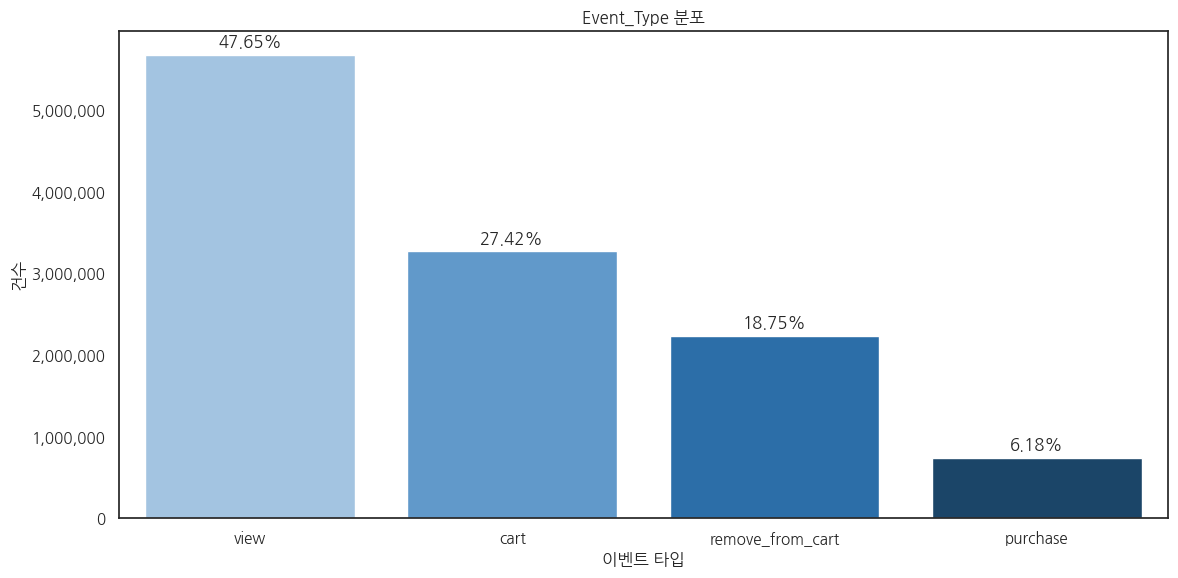

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 사용자 지정 4색 팔레트 (팔레트에서 4, 8, 12, 16번째 추출)
custom_palette_4 = [
    '#99c5eb',
    '#509adB',
    '#1770bd',
    '#0e4675'
]

# event_type 개수 및 백분율 계산
event_type_counts = df['event_type'].value_counts()
event_type_percent = event_type_counts / event_type_counts.sum() * 100

# ✅ 시각화 (Seaborn 막대그래프)
ax = sns.barplot(
    x=event_type_counts.index,
    y=event_type_counts.values,
    palette=custom_palette_4
)

plt.title('Event_Type 분포')
plt.xlabel('이벤트 타입')
plt.ylabel('건수')

# ✅ y축 숫자에 쉼표 추가
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 각 막대 위에 백분율 라벨 추가
for i, (count, percent) in enumerate(zip(event_type_counts.values, event_type_percent.values)):
    ax.text(i, count + max(event_type_counts.values)*0.01, f'{percent:.2f}%', 
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

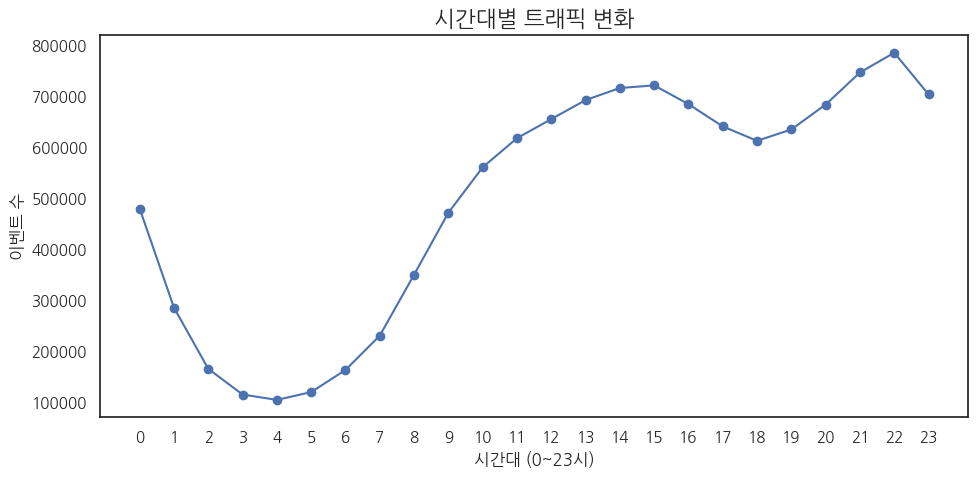

In [56]:
# 시간 단위 추출
df['event_hour'] = pd.to_datetime(df['event_time_moscow']).dt.hour

# 시간별 이벤트 수 집계
hourly_traffic = df.groupby('event_hour').size().reset_index(name='event_count')

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(hourly_traffic['event_hour'], hourly_traffic['event_count'], marker='o')
plt.title('시간대별 트래픽 변화', fontsize=16)
plt.xlabel('시간대 (0~23시)')
plt.ylabel('이벤트 수')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

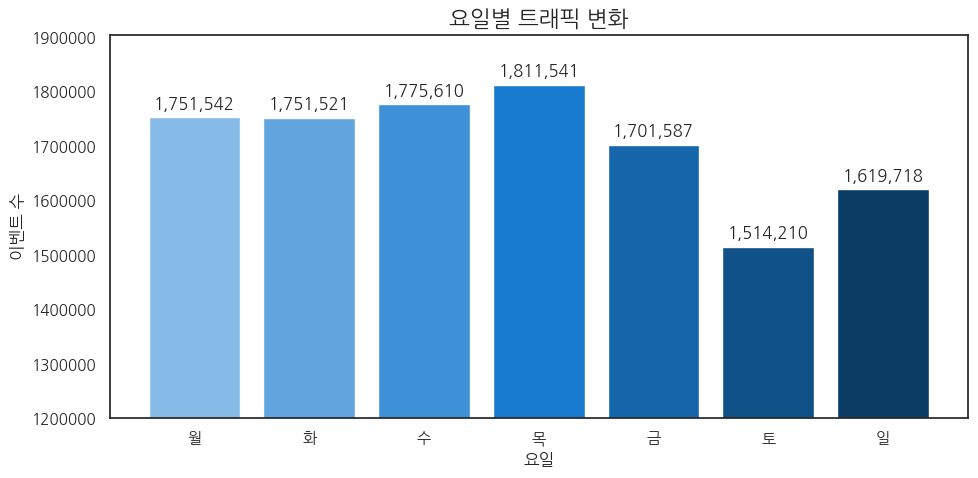

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 팔레트에서 4, 6, 8, 10, 12, 14, 16번째 색상 추출
blue_palette = [
    '#86bae7',
    '#62a5df',
    '#3e90d7',
    '#197bcf',
    '#1566ab',
    '#105187',
    '#0b3c63'
]

# 요일 추출
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'], errors='coerce')
df['weekday'] = df['event_time_moscow'].dt.dayofweek
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['weekday_name'] = df['weekday'].map(weekday_map)

# 요일별 이벤트 수 집계 및 정렬
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
weekday_counts = df['weekday_name'].value_counts().reindex(weekday_order)

# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(weekday_counts.index, weekday_counts.values, color=blue_palette)

# 라벨링 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10000, f'{int(height):,}',
             ha='center', va='bottom', fontsize=12)

# 지수 표현 제거 + y축 시작값 설정
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(1200000, weekday_counts.max() * 1.05)

# 그래프 설정
plt.title('요일별 트래픽 변화', fontsize=16)
plt.xlabel('요일')
plt.ylabel('이벤트 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

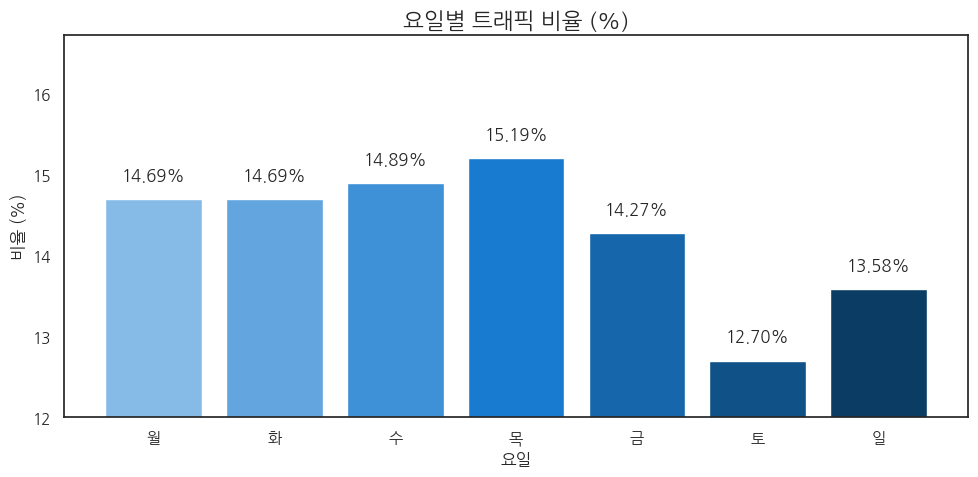

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# 팔레트에서 4, 6, 8, 10, 12, 14, 16번째 색상 추출
blue_palette = [
    '#86bae7',
    '#62a5df',
    '#3e90d7',
    '#197bcf',
    '#1566ab',
    '#105187',
    '#0b3c63'
]

# 요일 추출
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'], errors='coerce')
df['weekday'] = df['event_time_moscow'].dt.dayofweek
weekday_map = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
df['weekday_name'] = df['weekday'].map(weekday_map)

# 요일별 이벤트 수 → 비율 계산
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
weekday_counts = df['weekday_name'].value_counts().reindex(weekday_order)
weekday_ratio = weekday_counts / weekday_counts.sum() * 100  # 비율(%)

# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(weekday_ratio.index, weekday_ratio.values, color=blue_palette)

# 라벨링 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}%', 
             ha='center', va='bottom', fontsize=12)

# 그래프 설정
plt.title('요일별 트래픽 비율 (%)', fontsize=16)
plt.xlabel('요일')
plt.ylabel('비율 (%)')
plt.ylim(12, weekday_ratio.max() * 1.1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

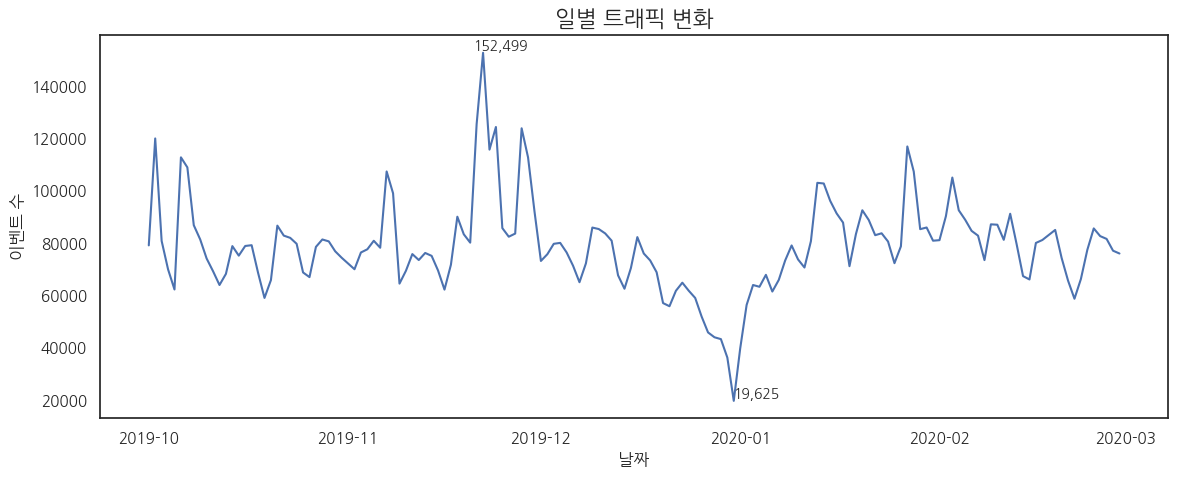

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# 날짜 단위 추출
df['event_date'] = pd.to_datetime(df['event_time_moscow']).dt.date

# 일별 이벤트 수 집계
daily_traffic = df.groupby('event_date').size().reset_index(name='event_count')

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(
    daily_traffic['event_date'],
    daily_traffic['event_count'],
)
plt.title('일별 트래픽 변화', fontsize=16)
plt.xlabel('날짜')
plt.ylabel('이벤트 수')
# plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(False)

# 상위 1개, 하위 1개 라벨링
highlight = pd.concat([
    daily_traffic.nlargest(1, 'event_count'),
    daily_traffic.nsmallest(1, 'event_count')
])

for _, row in highlight.iterrows():
    label_x = row['event_date'] + timedelta(days=7)
    label_y = row['event_count']
    plt.text(label_x, label_y, f"{row['event_count']:,}",
             ha='right', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### H27_cart 3회 이상 담은 이들의 구매 전환율이 높다.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 유저별 이벤트 집계
user_event_counts = df.pivot_table(
    index='user_id',
    columns='event_type',
    values='user_session',
    aggfunc='nunique',  # 세션 단위 중복 제거
    fill_value=0
).reset_index()

# 2. 그룹 나누기
group_A = user_event_counts[user_event_counts['cart'] >= 3].copy()
group_B = user_event_counts[user_event_counts['cart'] < 3].copy()

# 3. 전환 여부 플래그 (purchase ≥ 1이면 전환으로 간주)
group_A['converted'] = group_A['purchase'] > 0
group_B['converted'] = group_B['purchase'] > 0

# 4. 전환율 계산
conversion_A = group_A['converted'].mean()
conversion_B = group_B['converted'].mean()

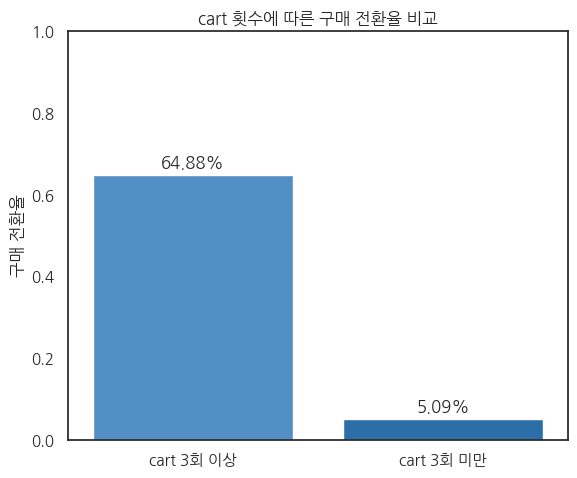

In [124]:
# 팔레트 지정
custom_palette = ['#3e90d7', '#1770bd']

# 그룹별 요약 데이터프레임 생성
group_summary = pd.DataFrame({
    'group': ['cart 3회 이상', 'cart 3회 미만'],
    'conversion_rate': [conversion_A, conversion_B]
})

# 시각화
plt.figure(figsize=(6, 5))
sns.barplot(
    data=group_summary,
    x='group',
    y='conversion_rate',
    palette=custom_palette
)

# 값 라벨 추가
for i, row in group_summary.iterrows():
    plt.text(i, row['conversion_rate'] + 0.01, f"{row['conversion_rate']:.2%}", 
             ha='center', va='bottom', fontsize=12)

# 레이아웃 설정
plt.title('cart 횟수에 따른 구매 전환율 비교')
plt.ylabel('구매 전환율')
plt.xlabel('')
plt.ylim(0, 1)
# plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [126]:
import pandas as pd

# datetime 변환
df['event_time_moscow'] = pd.to_datetime(df['event_time_moscow'])

# 1. 사용자별 첫 view 시점
first_view = df[df['event_type'] == 'view'].sort_values('event_time_moscow')
first_view = first_view.groupby('user_id')['event_time_moscow'].first().reset_index()
first_view.columns = ['user_id', 'first_view_time']

# 2. df에 첫 view 정보 병합
df = df.merge(first_view, on='user_id', how='left')

# 3. view 이후 30일 이내 구매 여부 계산
df['days_since_view'] = (df['event_time_moscow'] - df['first_view_time']).dt.days

# 30일 이내 purchase만 필터
within_30days = df[(df['event_type'] == 'purchase') & (df['days_since_view'] <= 30) & (df['days_since_view'] >= 0)]

# 유저별 30일 내 구매 수
purchase_counts = within_30days.groupby('user_id').size().reset_index(name='purchase_within_30days')

# 전체 유저에 merge (없으면 0으로)
first_view = first_view.merge(purchase_counts, on='user_id', how='left').fillna(0)
first_view['purchase_within_30days'] = first_view['purchase_within_30days'].astype(int)

# 4. 이후 구매 여부 계산 (30일 초과 이후의 구매 여부)
after_30days = df[(df['event_type'] == 'purchase') & (df['days_since_view'] > 30)]
after_30days_flag = after_30days.groupby('user_id').size().reset_index(name='future_purchases')
after_30days_flag['future_purchase_flag'] = True

# 사용자별 전환 플래그 병합
first_view = first_view.merge(after_30days_flag[['user_id', 'future_purchase_flag']], on='user_id', how='left')
first_view['future_purchase_flag'] = first_view['future_purchase_flag'].fillna(False)

# 5. 그룹 분류 (30일 내 3회 이상 vs 미만)
first_view['group'] = first_view['purchase_within_30days'].apply(lambda x: '3회 이상' if x >= 3 else '3회 미만')

# 6. 전환율 비교
conversion = first_view.groupby('group')['future_purchase_flag'].mean().reset_index()
conversion.columns = ['group', 'conversion_rate']
print(conversion)

   group  conversion_rate
0  3회 미만         0.012488
1  3회 이상         0.178766
